In [217]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [214]:
        filename = '/mnt/cube/Nasim/experiments/B952/mansort/Pen01_Lft_AP750_ML1750__Site01_Z1100__B952_cat_P01_S01_1/B952_cat_P01_S01_1.phy/cluster_store/0/main/10.mean_features'

In [215]:
test= np.fromfile(filename, dtype=np.float32)

In [216]:

test.shape


(96,)

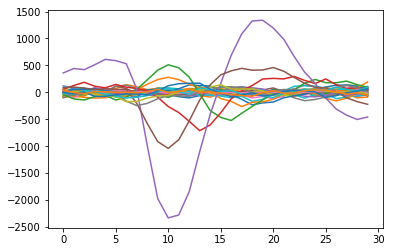

In [44]:
for x in range(32):
    plt.plot(test2[:, x])
plt.show()

In [196]:
import json
from ephys.core import find_info, load_spikes, find_kwd, find_kwik, find_kwx
import h5py as h5
block_path = '/mnt/cube/Nasim/experiments/B952/mansort/Pen01_Lft_AP750_ML1750__Site01_Z1100__B952_cat_P01_S01_1/'

In [201]:
#  open params

with open(find_info(block_path), 'rb') as infofile:
    info = json.load(infofile)
    prespike = info['params']['prespike']
    postspike = info['params']['postspike']
clusters = spikes['cluster'].unique()    

#clu = 10
for clu in clusters:
    spikes = load_spikes(block_path)
    cluspikes = spikes[spikes['cluster']==clu]
    cluspiketimes = cluspikes['time_samples'].values
    mean_waveform = np.zeros((prespike+postspike, 32))
    
    waveforms = np.zeros((len(cluspiketimes), prespike+postspike, 32))
    with h5.File(find_kwd(block_path), 'r') as kwdf:
        for ind, sptime in enumerate(cluspiketimes):
            test = kwdf['/recordings/0/data'][int(sptime-prespike):int(sptime+postspike), :]
            waveforms[ind, :, :] =test
            mean_waveform += test

    waveforms = waveforms.flatten()
    mean_waveform /= len(cluspiketimes)
    mean_waveform = mean_waveform.flatten()

(83520,) (960,)


In [207]:
def spikeindices(block_path, cluster, channel_group=0, clustering='main'):
    with h5.File(find_kwik(block_path), 'r') as kwikf:
        sptimes = kwikf['/channel_groups/{}/spikes/clusters/{}'.format(channel_group, clustering)][:]
    return (sptimes == cluster)


with h5.File(find_kwx(block_path), 'r') as kwxf:
    
    clu_spike_inds = spikeindices(block_path, clu)
    nspike = np.count_nonzero(clu_spike_inds)
    masks = kwxf['/channel_groups/0/features_masks'][clu_spike_inds, :,1]
    masks = np.reshape(masks, (nspike, 32, -1))
    masks = np.mean(masks, axis=2)
    mean_masks = np.mean(masks, axis=0)
    features = kwxf['/channel_groups/0/features_masks'][clu_spike_inds, :,0]
    mean_features = np.mean(features,axis=0)
    features = features.flatten()
    masks = masks.flatten()
    print(features.shape, mean_features.shape, masks.shape, mean_masks.shape)

(8352,) (96,) (2784,) (32,)


In [244]:
block_path = '/mnt/cube/Nasim/experiments/B952/mansort/Pen01_Lft_AP750_ML1750__Site01_Z1500__B952_cat_P01_S01_2/'
block_path = '/mnt/cube/Nasim/experiments/B952/mansort/Pen01_Lft_AP750_ML1750__Site01_Z2000__B952_cat_P01_S01_3/'
def make_phy_folder(block_path):
    kwikf = find_kwik(block_path)
    kwikfname = os.path.split(kwikf)[1]
    kwikname = os.path.splitext(kwikfname)[0]
    phy_fold = os.path.join(block_path, kwikname+'.phy')
    phy_fold = os.path.abspath(os.path.join(phy_fold, 'cluster_store/0/main/'))
    if not os.path.exists(phy_fold):
        os.makedirs(phy_fold)
    return phy_fold
    

def spikeindices(block_path, cluster, channel_group=0, clustering='main'):
    with h5.File(find_kwik(block_path), 'r') as kwikf:
        sptimes = kwikf['/channel_groups/{}/spikes/clusters/{}'.format(channel_group, clustering)][:]
    return (sptimes == cluster)

#clu = 10
with open(find_info(block_path), 'rb') as infofile:
    info = json.load(infofile)
    prespike = info['params']['prespike']
    postspike = info['params']['postspike']
clusters = spikes['cluster'].unique()
spikes = load_spikes(block_path)
phy_fold = make_phy_folder(block_path)

In [245]:
print(sorted(clusters))

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]


In [246]:

for clu in sorted(clusters):
    print("Cluster: {}".format(clu))
    cluspikes = spikes[spikes['cluster']==clu]
    cluspiketimes = cluspikes['time_samples'].values
    mean_waveform = np.zeros((prespike+postspike, 32))
    
    waveforms = np.zeros((len(cluspiketimes), prespike+postspike, 32))
    with h5.File(find_kwd(block_path), 'r') as kwdf:
        for ind, sptime in enumerate(cluspiketimes):
            test = np.zeros((prespike+postspike, 32))
            start_ind = max((int(sptime-prespike)), 0)
            start_ind2 = abs(min(int(sptime-prespike), 0))
            test[start_ind2:] = kwdf['/recordings/0/data'][start_ind:int(sptime+postspike), :]
            waveforms[ind, :, :] =test
            mean_waveform += test

    waveforms = waveforms.flatten()
    mean_waveform /= len(cluspiketimes)
    mean_waveform = mean_waveform.flatten()
    with h5.File(find_kwx(block_path), 'r') as kwxf:
    
        clu_spike_inds = spikeindices(block_path, clu)
        nspike = np.count_nonzero(clu_spike_inds)
        masks = kwxf['/channel_groups/0/features_masks'][clu_spike_inds, :,1]
        masks = np.reshape(masks, (nspike, 32, -1))
        masks = np.mean(masks, axis=2)
        mean_masks = np.mean(masks, axis=0)
        features = kwxf['/channel_groups/0/features_masks'][clu_spike_inds, :,0]
        mean_features = np.mean(features,axis=0)
        features = features.flatten()
        masks = masks.flatten()
        
        # make phy folder

    waveforms.tofile(os.path.join(phy_fold, '{}.waveforms'.format(clu)))
    mean_waveform.tofile(os.path.join(phy_fold, '{}.mean_waveforms'.format(clu)))
    masks.tofile(os.path.join(phy_fold, '{}.masks'.format(clu)))
    mean_masks.tofile(os.path.join(phy_fold, '{}.mean_masks'.format(clu)))
    mean_features.tofile(os.path.join(phy_fold, '{}.mean_features'.format(clu)))
    features.tofile(os.path.join(phy_fold, '{}.features'.format(clu)))
                

Cluster: 0
Cluster: 2
Cluster: 3
Cluster: 4
Cluster: 5
Cluster: 6
Cluster: 7
Cluster: 8
Cluster: 9
Cluster: 10
Cluster: 11
Cluster: 12
Cluster: 13
Cluster: 14
Cluster: 15
Cluster: 16
Cluster: 17
Cluster: 18
Cluster: 19
Cluster: 20
Cluster: 21
Cluster: 22
Cluster: 23
Cluster: 24
Cluster: 25
Cluster: 26
Cluster: 27
Cluster: 28
Cluster: 29
Cluster: 30
Cluster: 31
Cluster: 32
Cluster: 33
Cluster: 34
Cluster: 35
Cluster: 36
Cluster: 37
Cluster: 38
Cluster: 39
Cluster: 40
Cluster: 41
Cluster: 42
Cluster: 43
Cluster: 44
Cluster: 45
Cluster: 46
Cluster: 47
Cluster: 48
Cluster: 49
Cluster: 50
Cluster: 51
Cluster: 52
Cluster: 53
Cluster: 54
Cluster: 55
Cluster: 56
Cluster: 57
Cluster: 58
Cluster: 59
Cluster: 60
Cluster: 61
Cluster: 62
Cluster: 63
Cluster: 64
Cluster: 65
Cluster: 66
Cluster: 67
Cluster: 68
Cluster: 69
Cluster: 70
Cluster: 71
Cluster: 72
Cluster: 73
Cluster: 74
Cluster: 75
Cluster: 76
Cluster: 77
Cluster: 78
Cluster: 79
Cluster: 80
Cluster: 81
Cluster: 82
Cluster: 83
Cluster: 84
C

In [232]:
abs(int(sptime-prespike))

379

In [224]:
sptime

3